# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import seaborn as sns
import xgboost as xgb
from imblearn.over_sampling import SMOTE
import pickle
%matplotlib inline

# Reading the data file

In [2]:
df_org = pd.read_excel('updt-Data.xlsx')
df_org

,horse_master_flat_sys_id,horse_master_sys_id,handi_id,club_id,club_name,season_id,season,race_day_id,race_date,race_time,...,odds_t7_time,(Odds_10 Min_before_Race),odds_t8_id,odds_t8_time,(Odds_5_Min_before_Race),odds_t9_id,odds_t9_time,Closing_Odds,odds_t10_id,odds_t10_time
0,26272,537016,345678,4,HYDERABAD,65,Monsoon Season,4744,2019-09-01,1:15 PM,...,NaN,NaN,0,NaN,NaN,0,NaN,5/4,10098,13:15
1,26273,537017,345683,4,HYDERABAD,65,Monsoon Season,4744,2019-09-01,1:15 PM,...,NaN,NaN,0,NaN,NaN,0,NaN,20,10099,13:15
2,26274,537018,345681,4,HYDERABAD,65,Monsoon Season,4744,2019-09-01,1:15 PM,...,NaN,NaN,0,NaN,NaN,0,NaN,6,10100,13:15
3,26275,537019,345682,4,HYDERABAD,65,Monsoon Season,4744,2019-09-01,1:15 PM,...,NaN,NaN,0,NaN,NaN,0,NaN,15,10101,13:15
4,26276,537020,345680,4,HYDERABAD,65,Monsoon Season,4744,2019-09-01,1:15 PM,...,NaN,NaN,0,NaN,NaN,0,NaN,20,10102,13:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15552,26259,552562,361781,6,MUMBAI,68,Winter Season,4975,2020-03-12,8:00 PM,...,19:45,3 1/2,43070,19:50,3 1/2,43079,19:55,36/10,43151,20:00
15553,26260,552563,361782,6,MUMBAI,68,Winter Season,4975,2020-03-12,8:00 PM,...,19:45,12,43071,19:50,12,43080,19:55,14/1,43152,20:00
15554,26257,552560,361798,6,MUMBAI,68,Winter Season,4975,2020-03-12,8:00 PM,...,19:45,6,43077,19:50,6,43086,19:55,14/1,43158,20:00
15555,26262,552565,361784,6,MUMBAI,68,Winter Season,4975,2020-03-12,8:00 PM,...,19:45,6,43073,19:50,6,43082,19:55,-,43154,20:00


# Converting all odds into numerical value. Then calculate winning odds

In [3]:
# Filling null values with zero
odds_cols = ['Night_Odds','Morning_Odds','Opening_Odds','(Odds_30 Min_before_Race)','(Odds_25 Min_before_Race)','(Odds_20 Min_before_Race)','(Odds_15 Min_before_Race)','(Odds_10 Min_before_Race)','(Odds_5_Min_before_Race)','Closing_Odds']
for x in odds_cols:
    df_org[x] = df_org[x].fillna(value=0,inplace=True)

# Converting odds into numerical value
def convert_odds(x):

    try:
        values = x.split("/")
        values_ = x.split(' ')
        if(len(values_)==1 and len(values)==2):
            numerator = float(values[0])
            denominator = float(values[1])
            result = numerator/denominator
            return result
        
        elif(len(values_)==2 and len(values)==2):
            numerator = float(values_[1].split('/')[0])
            denominator = float(values[1])
            whole_number = float(values_[0])
            result = ((denominator * whole_number)+numerator)/denominator
            return result
        
        elif(len(values_)==1 and len(values)==1):
            return float(x)
        
    except:
           if(x=='e' or x=='E'):
                return 2.71
           return 0.0
                
df_org['Night_Odds'] = df_org['Night_Odds'].apply(lambda x:convert_odds(x))
df_org['Morning_Odds'] = df_org['Morning_Odds'].apply(lambda x:convert_odds(x))
df_org['Opening_Odds'] = df_org['Opening_Odds'].apply(lambda x:convert_odds(x))
df_org['(Odds_30 Min_before_Race)'] = df_org['(Odds_30 Min_before_Race)'].apply(lambda x:convert_odds(x))
df_org['(Odds_25 Min_before_Race)'] = df_org['(Odds_25 Min_before_Race)'].apply(lambda x:convert_odds(x))
df_org['(Odds_20 Min_before_Race)'] = df_org['(Odds_20 Min_before_Race)'].apply(lambda x:convert_odds(x))
df_org['(Odds_15 Min_before_Race)'] = df_org['(Odds_15 Min_before_Race)'].apply(lambda x:convert_odds(x))
df_org['(Odds_10 Min_before_Race)'] = df_org['(Odds_10 Min_before_Race)'].apply(lambda x:convert_odds(x))
df_org['(Odds_5_Min_before_Race)'] = df_org['(Odds_5_Min_before_Race)'].apply(lambda x:convert_odds(x))
df_org['Closing_Odds'] = df_org['Closing_Odds'].apply(lambda x:convert_odds(x))

In [4]:
#checking null values and type of odds.
df = df_org[['Night_Odds','Morning_Odds','Opening_Odds','(Odds_30 Min_before_Race)','(Odds_25 Min_before_Race)','(Odds_20 Min_before_Race)','(Odds_15 Min_before_Race)','(Odds_10 Min_before_Race)','(Odds_5_Min_before_Race)','Closing_Odds']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15557 entries, 0 to 15556
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Night_Odds                 15557 non-null  float64
 1   Morning_Odds               15557 non-null  float64
 2   Opening_Odds               15557 non-null  float64
 3   (Odds_30 Min_before_Race)  15557 non-null  float64
 4   (Odds_25 Min_before_Race)  15557 non-null  float64
 5   (Odds_20 Min_before_Race)  15557 non-null  float64
 6   (Odds_15 Min_before_Race)  15557 non-null  float64
 7   (Odds_10 Min_before_Race)  15557 non-null  float64
 8   (Odds_5_Min_before_Race)   15557 non-null  float64
 9   Closing_Odds               15557 non-null  float64
dtypes: float64(10)
memory usage: 1.2 MB


In [5]:
# Calculating winning odds
winning_odds = []
for x in range(len(df_org)):
    winning_odds.append((df_org['Night_Odds'][x] + df_org['Morning_Odds'][x] + df_org['Opening_Odds'][x] + df_org['(Odds_30 Min_before_Race)'][x] + df_org['(Odds_25 Min_before_Race)'][x] + df_org['(Odds_20 Min_before_Race)'][x] + df_org['(Odds_15 Min_before_Race)'][x] + df_org['(Odds_10 Min_before_Race)'][x] + df_org['(Odds_5_Min_before_Race)'][x] + df_org['Closing_Odds'][x])/10)
    
df_org['winning_odds'] = winning_odds

# Removing all ID's columns as there is no correspondance of the ids' , date, time and some other features(columns) with performance.¶

In [6]:
df_org.drop(columns=['horse_master_flat_sys_id','horse_master_sys_id','handi_id','stud_id','is_active','club_id','season_id','race_day_id','race_date','race_time','race_no_id','distance_id','horse_id','horse_name','trainer_id','jockey_id','created_on','updated_on','is_deleted','MasterType','event_type','race_date_time','year','season_race_no','color','color_id','weight_id','cup_id','dam_id','sire_id','track_id','race_day_no','day_race_no','race_class_short','race_class_id','race_fav_horse','race_fav_id','horse_dob','dam_by_id','shoe_id','owner_id','jursey_No','incident','incident1','allowance_id','sex_id','rail','rail_id','ex_name','equp1_id','equp2_id','equp3_id','equp4_id','equp5_id','equp6_id','equp7_id','equp8_id','equp9_id','equp10_id','odds_t1_id','odds_t1_time','odds_t2_id','odds_t2_time','odds_t3_id','odds_t3_time','odds_t4_id','odds_t4_time','odds_t5_id','odds_t5_time','odds_t6_id','odds_t6_time','odds_t7_id','odds_t7_time','odds_t8_id','odds_t8_time','odds_t9_id','odds_t9_time','odds_t10_id','odds_t10_time','jursey_id','bit1_id','bit2_id','bit3_id','bit4_id','bit5_id','Night_Odds','Morning_Odds','Opening_Odds','(Odds_30 Min_before_Race)','(Odds_25 Min_before_Race)','(Odds_20 Min_before_Race)','(Odds_15 Min_before_Race)','(Odds_10 Min_before_Race)','(Odds_5_Min_before_Race)','Closing_Odds'],inplace=True)
df_org

,club_name,season,distance,trainer_name,jockey_name,horse_career_earnings,horse_seq,age,weight,cup,...,equp2,equp3,equp4,equp5,equp6,equp7,equp8,equp9,equp10,winning_odds
0,HYDERABAD,Monsoon Season,2400,R H Sequeira,Akshay Kumar,405002,2,3,59.5,THE RED CHIEFTAN PLATE,...,TS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,HYDERABAD,Monsoon Season,2400,Mir Faiyaz Ali Khan,Surya Prakash,1416239,7,6,54,THE RED CHIEFTAN PLATE,...,BLK,RDB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,HYDERABAD,Monsoon Season,2400,A Vatsalya,Afroz Khan,481966,5,4,55.5,THE RED CHIEFTAN PLATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,HYDERABAD,Monsoon Season,2400,Laxman Singh,Gopal Singh,286500,6,4,54,THE RED CHIEFTAN PLATE,...,RB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,HYDERABAD,Monsoon Season,2400,Laxman Singh,Praveen Gaddam,596918,4,4,56,THE RED CHIEFTAN PLATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15552,MUMBAI,Winter Season,1200,M K Jadhav,A Sandesh,1405376,2,8,60.5,THE ROYAL DEEDS PLATE,...,TS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
15553,MUMBAI,Winter Season,1200,Narendra Lagad,P S Kaviraj,720442,3,7,60,THE ROYAL DEEDS PLATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
15554,MUMBAI,Winter Season,1200,Nazzak B Chenoy,D R Shubham,0,4,4,60,THE ROYAL DEEDS PLATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
15555,MUMBAI,Winter Season,1200,Adhirajsingh Jodha,Withdrawn,0,6,4,59,THE ROYAL DEEDS PLATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


# Converting weight into numerical values

In [7]:
# Converting weigth into numerical value
def convert_weight_to_float(x):
    try:
        return float(x)
    except:
        value = x.split(".")
        return float(value[0]+'.'+value[2])
        
    

df_org['weight'] = df_org['weight'].apply(lambda x:convert_weight_to_float(x))
df_org['weight'].fillna(value=df_org['weight'].median(),inplace=True)

# Converting net-distance into numerical values.

In [8]:
# Converting weigth into numerical value
def convert_netDistance_to_float(x):
    try:
        return float(x)
    except:
        return np.nan
    
df_org['net_dist'] = df_org['net_dist'].apply(lambda x:convert_netDistance_to_float(x))

# So after cleaning some irrelevant columns, we got total of 54 columns. In this data, the "position" column is our target class.

# Now first, we will check for columns that contains NULL values. We will remove those features that contains NULL values more than 30%.¶

In [9]:
# Total length of dataset
total_rows = len(df_org)


#If a column holds more than 30% null values than it will be neglected
for x in df_org.columns:
    if( round(((df_org[x].isna().sum())/total_rows)*100,2) > 30.0  ):
        df_org.drop(columns=x,axis=1,inplace=True)

df_org

,club_name,season,distance,trainer_name,jockey_name,horse_career_earnings,horse_seq,age,weight,cup,...,rating,sex,finish_minutes,finish_seconds,finish_miliseconds,won_by,net_dist,Penetrometer,equp1,winning_odds
0,HYDERABAD,Monsoon Season,2400,R H Sequeira,Akshay Kumar,405002,2,3,59.5,THE RED CHIEFTAN PLATE,...,39,g,2.0,37.0,144.0,2.25,0.00,4.97,XNB,0.0
1,HYDERABAD,Monsoon Season,2400,Mir Faiyaz Ali Khan,Surya Prakash,1416239,7,6,54.0,THE RED CHIEFTAN PLATE,...,25,m,2.0,37.0,582.0,3.50,2.25,4.97,XNB,0.0
2,HYDERABAD,Monsoon Season,2400,A Vatsalya,Afroz Khan,481966,5,4,55.5,THE RED CHIEFTAN PLATE,...,31,g,2.0,38.0,379.0,1.25,5.75,4.97,TS,0.0
3,HYDERABAD,Monsoon Season,2400,Laxman Singh,Gopal Singh,286500,6,4,54.0,THE RED CHIEFTAN PLATE,...,30,g,2.0,38.0,537.0,4.75,7.00,4.97,TS,0.0
4,HYDERABAD,Monsoon Season,2400,Laxman Singh,Praveen Gaddam,596918,4,4,56.0,THE RED CHIEFTAN PLATE,...,34,c,2.0,39.0,487.0,3.75,11.75,4.97,BLK,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15552,MUMBAI,Winter Season,1200,M K Jadhav,A Sandesh,1405376,2,8,60.5,THE ROYAL DEEDS PLATE,...,28,g,1.0,13.0,470.0,1.50,8.50,3.80,BLK,0.0
15553,MUMBAI,Winter Season,1200,Narendra Lagad,P S Kaviraj,720442,3,7,60.0,THE ROYAL DEEDS PLATE,...,27,g,1.0,13.0,737.0,6.25,10.00,3.80,TS,0.0
15554,MUMBAI,Winter Season,1200,Nazzak B Chenoy,D R Shubham,0,4,4,60.0,THE ROYAL DEEDS PLATE,...,27,f,1.0,14.0,783.0,NaN,16.25,3.80,TS,0.0
15555,MUMBAI,Winter Season,1200,Adhirajsingh Jodha,Withdrawn,0,6,4,59.0,THE ROYAL DEEDS PLATE,...,25,f,0.0,0.0,0.0,NaN,NaN,3.80,NaN,0.0


In [10]:
# checking features with null values
df_org.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15557 entries, 0 to 15556
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   club_name              15557 non-null  object 
 1   season                 15557 non-null  object 
 2   distance               15557 non-null  int64  
 3   trainer_name           15557 non-null  object 
 4   jockey_name            15557 non-null  object 
 5   horse_career_earnings  15557 non-null  int64  
 6   horse_seq              15557 non-null  int64  
 7   age                    15557 non-null  int64  
 8   weight                 15557 non-null  float64
 9   cup                    15531 non-null  object 
 10  dam                    15557 non-null  object 
 11  sire                   15556 non-null  object 
 12  track                  15351 non-null  object 
 13  race_class             15557 non-null  object 
 14  winner                 15557 non-null  int64  
 15  se

In [11]:
# dropping rows that contains any null values
df_org.dropna(axis=0,how='any',inplace=True)
df_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10382 entries, 0 to 15553
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   club_name              10382 non-null  object 
 1   season                 10382 non-null  object 
 2   distance               10382 non-null  int64  
 3   trainer_name           10382 non-null  object 
 4   jockey_name            10382 non-null  object 
 5   horse_career_earnings  10382 non-null  int64  
 6   horse_seq              10382 non-null  int64  
 7   age                    10382 non-null  int64  
 8   weight                 10382 non-null  float64
 9   cup                    10382 non-null  object 
 10  dam                    10382 non-null  object 
 11  sire                   10382 non-null  object 
 12  track                  10382 non-null  object 
 13  race_class             10382 non-null  object 
 14  winner                 10382 non-null  int64  
 15  se

# Using Hot One-Encoder to handle categorical values. We will choose top 10 most frequent values for hot hone encoder¶

In [12]:
def one_hot_encoder(category):
    top_10 = [x for x in df_org[category].value_counts().sort_values(ascending=False).head(10).index] 
    for label in top_10:
        df_org[category+'_'+label] = np.where(df_org[category]==label,1,0)
    

In [13]:
for x in df_org.columns:
    if(df_org[x].dtype==object):
        one_hot_encoder(x)
        df_org.drop(labels=x,axis=1,inplace=True)

In [14]:
df_org

,distance,horse_career_earnings,horse_seq,age,weight,winner,second,third,forth,fifth,...,equp1_TS,equp1_BLK,equp1_XNB,equp1_CNB,equp1_BB,equp1_RDB,equp1_SCP,equp1_HOOD,equp1_DRB,equp1_RB
0,2400,405002,2,3,59.5,202501,112501,90000,22500,13500,...,0,0,1,0,0,0,0,0,0,0
1,2400,1416239,7,6,54.0,202501,112501,90000,22500,13500,...,0,0,1,0,0,0,0,0,0,0
2,2400,481966,5,4,55.5,202501,112501,90000,22500,13500,...,1,0,0,0,0,0,0,0,0,0
3,2400,286500,6,4,54.0,202501,112501,90000,22500,13500,...,1,0,0,0,0,0,0,0,0,0
4,2400,596918,4,4,56.0,202501,112501,90000,22500,13500,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15549,1200,299675,9,4,57.0,153000,66000,42000,27000,12000,...,1,0,0,0,0,0,0,0,0,0
15550,1200,663000,1,4,61.5,153000,66000,42000,27000,12000,...,0,1,0,0,0,0,0,0,0,0
15551,1200,27000,8,4,58.5,153000,66000,42000,27000,12000,...,0,0,0,0,0,0,0,1,0,0
15552,1200,1405376,2,8,60.5,153000,66000,42000,27000,12000,...,0,1,0,0,0,0,0,0,0,0


# Getting correlation for all features with our target class¶

In [15]:
# Getting correlation Dataframe
correlation_data = df_org.corr()
correlation_data

,distance,horse_career_earnings,horse_seq,age,weight,winner,second,third,forth,fifth,...,equp1_TS,equp1_BLK,equp1_XNB,equp1_CNB,equp1_BB,equp1_RDB,equp1_SCP,equp1_HOOD,equp1_DRB,equp1_RB
distance,1.000000,0.194740,-0.105563,-0.014918,-0.001699,0.297272,0.306207,0.291566,0.288629,0.189077,...,0.029421,-0.051242,0.024471,0.010317,0.016847,-0.011226,-0.003686,-0.017094,0.004146,-0.011667
horse_career_earnings,0.194740,1.000000,-0.109058,0.273299,0.024131,0.241161,0.252490,0.266635,0.284004,0.140929,...,0.023182,-0.075572,0.019440,0.011533,0.032135,0.018738,0.006145,0.012172,0.002864,0.002664
horse_seq,-0.105563,-0.109058,1.000000,0.082105,-0.229160,0.017502,0.011432,0.003729,0.014258,0.026152,...,-0.032165,0.038072,0.001928,0.014736,-0.010961,-0.002151,-0.003456,0.000693,-0.023668,0.007026
age,-0.014918,0.273299,0.082105,1.000000,-0.000906,-0.101587,-0.120077,-0.151586,-0.076793,-0.126106,...,-0.078230,0.088698,-0.060489,0.044725,-0.006464,-0.007636,-0.020243,0.003272,-0.039349,-0.017689
weight,-0.001699,0.024131,-0.229160,-0.000906,1.000000,0.001654,-0.001528,-0.005891,-0.002057,-0.001564,...,0.002731,-0.015244,-0.011247,0.008667,0.006552,-0.006982,-0.000104,-0.004901,-0.001116,0.005471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
equp1_RDB,-0.011226,0.018738,-0.002151,-0.007636,-0.006982,-0.005659,0.001483,0.016358,-0.013718,-0.001746,...,-0.128235,-0.071589,-0.024743,-0.023503,-0.019855,1.000000,-0.013360,-0.009667,-0.009667,-0.009524
equp1_SCP,-0.003686,0.006145,-0.003456,-0.020243,-0.000104,-0.007315,-0.002062,0.008337,-0.011733,-0.003666,...,-0.122665,-0.068479,-0.023669,-0.022482,-0.018992,-0.013360,1.000000,-0.009247,-0.009247,-0.009111
equp1_HOOD,-0.017094,0.012172,0.000693,0.003272,-0.004901,-0.003162,-0.009207,-0.014758,0.013391,0.013142,...,-0.088756,-0.049549,-0.017126,-0.016267,-0.013742,-0.009667,-0.009247,1.000000,-0.006691,-0.006592
equp1_DRB,0.004146,0.002864,-0.023668,-0.039349,-0.001116,0.012935,0.021658,0.032362,0.005226,0.003290,...,-0.088756,-0.049549,-0.017126,-0.016267,-0.013742,-0.009667,-0.009247,-0.006691,1.000000,-0.006592


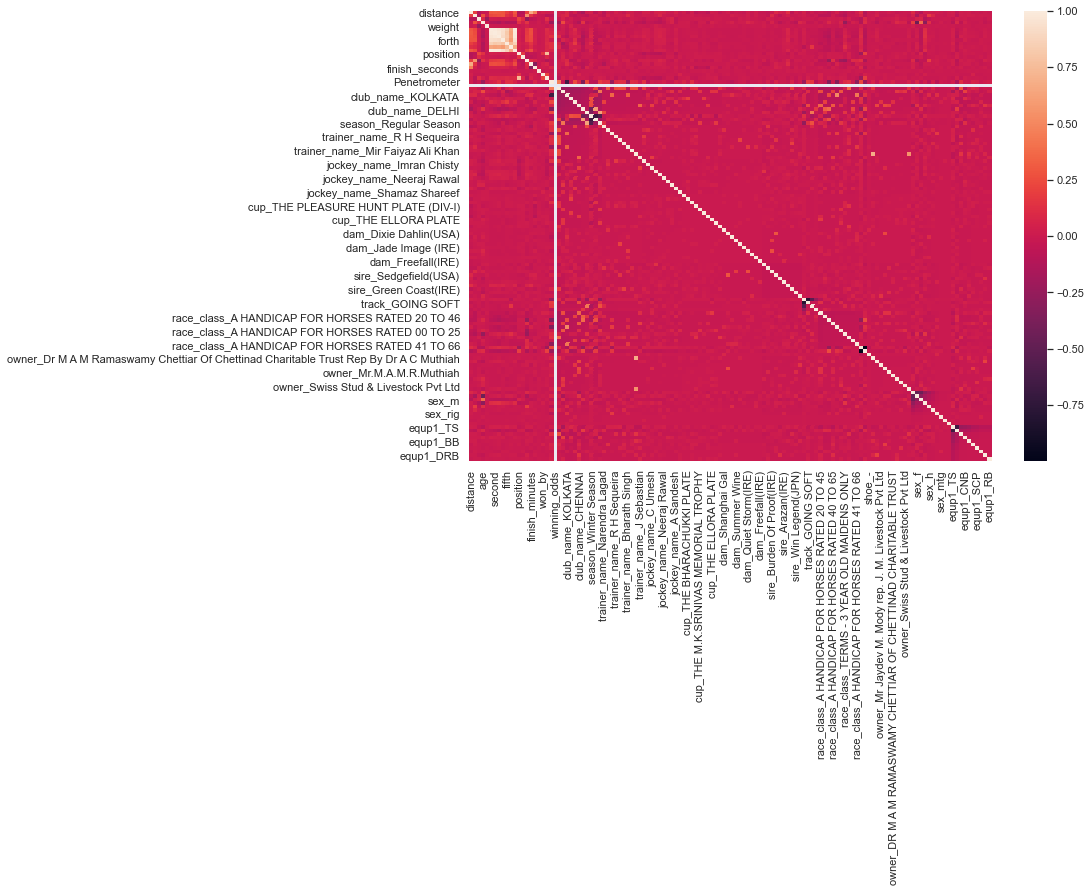

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(correlation_data)


In [17]:
#Setting Standard Range (-0.1 , +0.1).
#Any Feature lies in this range will be omit 

cols_to_be_selected = []
all_cols = correlation_data.columns
index = 0;

for x in correlation_data['position'].tolist():
    if(x >= -0.1 and x <=0.1):
        #neglecting the feature / column
        pass
    else:
        cols_to_be_selected.append(all_cols[index])
    index += 1

cols_to_be_selected

['distance',
 'horse_seq',
 'age',
 'position',
 'draw',
 'won_by',
 'net_dist',
 'winning_odds',
 'shoe_A',
 'shoe_S']

#  Checking imbalance data

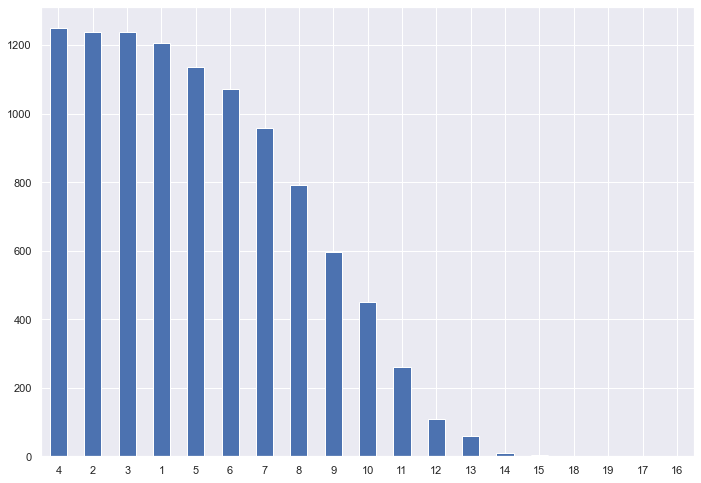

In [18]:
# checking number of positions with quantity in data-set
final_df = df_org[cols_to_be_selected]
(df_org['position'].value_counts()).plot(kind='bar',rot=0)

In [19]:
cols = ['distance','horse_seq','age','draw','won_by','net_dist','winning_odds','shoe_A','shoe_S','position']

final_df['position'].value_counts()

4     1249
2     1239
3     1237
1     1205
5     1136
6     1072
7      959
8      792
9      595
10     451
11     260
12     109
13      59
14      10
15       5
18       1
19       1
17       1
16       1
Name: position, dtype: int64

# Testing xgboost regression model 

In [20]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split


#converting dataframe into numpy arrays
target = np.array(final_df['position'])
features = np.array(final_df[['distance','horse_seq','age','draw','won_by','net_dist','winning_odds','shoe_A','shoe_S']])
# features = np.array(final_df[['net_dist','horse_seq','won_by','winning_odds']])

train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (7786, 9)
Training Labels Shape: (7786,)
Testing Features Shape: (2596, 9)
Testing Labels Shape: (2596,)


In [21]:
# preparing xgboost model 
regressor = xgb.XGBRegressor(
    n_estimators=1000,
    gamma=0,
    max_depth=3,
    learning_rate=0.07,
    min_child_weight=1.5,
    reg_alpha=0.75,
    reg_lambda=0.45,
    subsample=0.6,
    seed=42
)

regressor.fit(train_features, train_labels)
y_pred = regressor.predict(test_features)
y_pred = np.abs(np.round(y_pred,0))


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(mean_squared_error(test_labels, y_pred))
print("R2 Score ",r2_score(test_labels, y_pred))

pickle.dump(regressor, open("xgboostRegressorModel", 'wb'))

apd = pd.DataFrame()
apd['actual_values'] = test_labels
apd['predcited_values'] = y_pred
apd.to_csv('abcdef.csv',index=False)

2.37904468412943
R2 Score  0.7345802025014054


# From xgboost regressor, we attain 73% of accuracy. Lets try some other methods too

# What we do now is that we convert positions into categorical feature with labels like top 5, top 10, top 20 

In [22]:
new_pos = []
for x in range(len(final_df)):
    pos = int(final_df.iloc[x]['position'])
    if(pos<=3):
        new_pos.append("1-3")
    elif(pos>=4 and pos<=6):
        new_pos.append("4-6")
    elif(pos>=7 and pos<=10):
        new_pos.append("7-10")
    else:
        new_pos.append(">10")

In [23]:
final_df.drop(columns='position',axis=1,inplace=True)
final_df

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,distance,horse_seq,age,draw,won_by,net_dist,winning_odds,shoe_A,shoe_S
0,2400,2,3,1,2.25,0.00,0.0,1,0
1,2400,7,6,4,3.50,2.25,0.0,1,0
2,2400,5,4,6,1.25,5.75,0.0,1,0
3,2400,6,4,7,4.75,7.00,0.0,1,0
4,2400,4,4,5,3.75,11.75,0.0,1,0
...,...,...,...,...,...,...,...,...,...
15549,1200,9,4,7,1.00,0.50,0.0,1,0
15550,1200,1,4,5,4.25,1.50,0.0,1,0
15551,1200,8,4,1,2.75,5.75,0.0,1,0
15552,1200,2,8,6,1.50,8.50,0.0,1,0


In [24]:
final_df['position'] = new_pos
final_df

C:\Users\S.M.Ammar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,distance,horse_seq,age,draw,won_by,net_dist,winning_odds,shoe_A,shoe_S,position
0,2400,2,3,1,2.25,0.00,0.0,1,0,1-3
1,2400,7,6,4,3.50,2.25,0.0,1,0,1-3
2,2400,5,4,6,1.25,5.75,0.0,1,0,1-3
3,2400,6,4,7,4.75,7.00,0.0,1,0,4-6
4,2400,4,4,5,3.75,11.75,0.0,1,0,4-6
...,...,...,...,...,...,...,...,...,...,...
15549,1200,9,4,7,1.00,0.50,0.0,1,0,1-3
15550,1200,1,4,5,4.25,1.50,0.0,1,0,1-3
15551,1200,8,4,1,2.75,5.75,0.0,1,0,4-6
15552,1200,2,8,6,1.50,8.50,0.0,1,0,4-6


# Converting imbalance data to balanced data

In [25]:
final_df['position'].value_counts()

1-3     3681
4-6     3457
7-10    2797
>10      447
Name: position, dtype: int64

In [26]:
# from imblearn.combine import SMOTETomek
X = final_df[['distance','horse_seq','age','draw','won_by','net_dist','winning_odds','shoe_A','shoe_S']] 
Y = final_df[['position']] 

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [27]:
Y['position'].value_counts()

4-6     3681
>10     3681
7-10    3681
1-3     3681
Name: position, dtype: int64

In [28]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split


#converting dataframe into numpy arrays
target = np.array(Y['position'])
features = np.array(X[['distance','horse_seq','age','draw','won_by','net_dist','winning_odds','shoe_A','shoe_S']])

train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (11043, 9)
Training Labels Shape: (11043,)
Testing Features Shape: (3681, 9)
Testing Labels Shape: (3681,)


#  Testing random forest classification model

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=120)
rfc.fit(train_features, train_labels)
pred_rfc = rfc.predict(test_features)

In [30]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
predictions = pred_rfc

rfc_acc = accuracy_score(test_labels, predictions)


print('Accuracy score : ', rfc_acc)


pickle.dump(rfc, open("RandomForestClassifierModel", 'wb'))

Accuracy score :  0.7223580548763923


#  Both models are good enough for real time prediction as the data itself contains so much variety. 

In [31]:
# p = pd.DataFrame()
# p['Actual values'] = test_labels
# p['predicted values'] = pred_rfc

# p.to_csv('actual vs predict.csv')